In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize,word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')


In [6]:
dataset = 'winemag-data-130k-v2.csv'

In [7]:
df = pd.read_csv(dataset, index_col = 'Unnamed: 0')

In [92]:
df.head(30)
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [8]:
np.array(str(df[df.columns[0]].values))
country_num =df['country'].unique()
df = df.dropna(subset=['price','points','country','province','variety','winery']).reset_index(drop=True)
province_num =df['province'].unique()
variety_num =df['variety'].unique()
winery_num =df['winery'].unique()

In [9]:
from scipy.stats import pearsonr
print("Pearson Correlation:", pearsonr(df.price, df.points))

Pearson Correlation: (0.4161971360153299, 0.0)


In [10]:
country_array = pd.get_dummies(df[df.columns[0]].values)
province_array =pd.get_dummies(df[df.columns[5]].values)
vareity_array = pd.get_dummies(df[df.columns[11]].values)
winery_array = pd.get_dummies(df[df.columns[12]].values)


In [11]:
train_df = [df['price'],country_array,province_array,vareity_array,df['points']]
df_model = pd.concat(train_df, axis=1)

In [97]:
df_model

,price,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,...,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka,points
0,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
1,14.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
2,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
3,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
4,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120910,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
120911,75.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
120912,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
120913,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90


# Correlation


In [28]:
import statsmodels.api as sm
print(sm.OLS(df.points, df.price).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                          9.503e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        15:06:41   Log-Likelihood:                     -6.7854e+05
No. Observations:              120915   AIC:                                  1.357e+06
Df Residuals:                  120914   BIC:                                  1.357e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

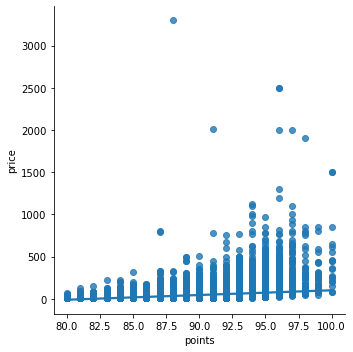

In [29]:
import seaborn as sns
sns.lmplot(y = 'price', x='points', data=df)

# Split 

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size = 0.3)
x_train = train.iloc[0:,0:-1]#independent variables 
y_train = train['points']# last column 
x_test = test.iloc[0:,0:-1]
y_test = test['points']
x_train

,price,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,...,Xynisteri,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
119506,90.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22355,40.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74228,75.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115881,12.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113931,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91852,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116196,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94602,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1523,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

model = linear_model.LinearRegression()
model.fit(x_train,y_train)
model.coef_

array([ 2.69524365e-02, -9.62598043e+09, -1.05091516e+10, ...,
       -2.18555511e+07, -2.18555517e+07, -2.18555487e+07])

In [30]:
from sklearn.metrics import r2_score
import math
training_predictions = model.predict(x_train)
testing_predictions  = model.predict(x_test)
#r2_score(y_test, testing_predictions)
mse = mean_squared_error(y_test, testing_predictions)
rmse = math.sqrt(mse)
rmse
#metrics.accuracy_score(y_test, y_pred)

5913180.5922039375

In [35]:
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.2795592032495491
Testing R-Square -244812419907997.44


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
r2_score(y_test, testing_predictions)


-244812419907997.44

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logit = LogisticRegression()
logit.fit(x_train,y_train)
y_pred = logit.predict(x_test)
y_pred


array([87, 87, 87, ..., 88, 87, 87])

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

2.491108931337153

In [25]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.17166092350103376

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
y_pred =dt_model.predict(x_test)

for i in range(10,30):
    dt_model = tree.DecisionTreeRegressor(max_depth=i)
#model = DecisionTreeRegressor(max_depth = 3)
    print(i,dt_model.fit(x_train,np.ravel(y_train)),dt_model.score(X=x_test, y=y_test))


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dt_model = tree.DecisionTreeRegressor(max_depth=17)
dt_model.fit(x_train,np.ravel(y_train))
dt_model.score(X=x_test, y=y_test)
y_pred =dt_model.predict(x_test)
#metrics.accuracy_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

2.3163821255450427

# RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=9,min_samples_leaf=4,min_samples_split=10,n_estimators=50)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
rf_model.fit(x_train,np.ravel(y_train))
rf_model.score(x_test,y_test)

0.16192970365265336

In [77]:
y_pred =rf_model.predict(x_test).round()
metrics.accuracy_score(y_test, y_pred)

0.16192970365265336

# BaggingClassifier

In [78]:
from sklearn.ensemble import BaggingClassifier
b_model=BaggingClassifier()
b_model.fit(x_train,np.ravel(y_train))
b_model.score(x_test,y_test)

0.19354927636113026

In [79]:
y_pred =b_model.predict(x_test).round()
metrics.accuracy_score(y_test, y_pred)

0.19354927636113026

# KNN

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test, y_test)


0.3660648841722639

In [38]:
mse = mean_squared_error(y_test, knn.predict(x_test))
rmse = math.sqrt(mse)
rmse

2.4199868428938744

In [103]:
metrics.accuracy_score(y_test, knn.predict(x_test).round())

0.17739490006891798

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model2 = SVC(kernel='linear', C=10) # kernel and C are the main args to adjust for linear SVC
model2.fit(x_train, y_train)
model2.score(x_train, y_train)